In [93]:
import pandas as pd
import matplotlib
import csv

In [2]:
df = pd.read_csv("Code_Complaints_and_Violations.csv")

In [3]:
df.head() #shows me the header row and "top" of the dataframe

,RecordNum,RecordType,RecordTypeMapped,RecordTypeDesc,Description,OpenDate,LastInspDate,LastInspResult,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,Link,Latitude,Longitude,Location1
0,001001-03CP,Complaint,Request,Construction,"Elevator gets stuck at least 3 times a week, f...",2003-11-10,POINT (-122.33582172 47.60642293),Completed,Completed,1100 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.606423,-122.335822,"(47.60642293, -122.33582172)"
1,001002-03CP,Complaint,Request,Construction,Concerned about RV pumpout that is currently b...,2003-11-10,POINT (-122.35191884 47.68639169),Completed,Completed,512 N 79TH ST,SEATTLE,WA,98103.0,https://cosaccela.seattle.gov/portal/customize...,47.686392,-122.351919,"(47.68639169, -122.35191884)"
2,001003-03CP,Complaint,Request,Vacant Building,The vacant red apple building and adjacent bui...,2003-11-10,POINT (-122.31388805 47.61559829),Completed,Completed,1400 E PINE ST,SEATTLE,WA,98122.0,https://cosaccela.seattle.gov/portal/customize...,47.615598,-122.313888,"(47.61559829, -122.31388805)"
3,001004-03CP,Complaint,Request,Land Use,Trailor and camper parked in back yard. Peopl...,2003-11-10,POINT (-122.36215164 47.69226044),Completed,Completed,332 NW 87TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.692260,-122.362152,"(47.69226044, -122.36215164)"
4,001005-03CP,Complaint,Request,Land Use,"Illegal use of property.""Hawkers"" or vendors (...",2003-11-10,POINT (-122.33832038 47.60911773),Completed,Completed,1430 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.609118,-122.338320,"(47.60911773, -122.33832038)"


In [5]:
print("Number of columns:", df.shape[1]) #1 shows me number of columns

Number of columns: 17


In [22]:
print("Number of rows:", df.shape[0]) #0 shows me the num of rows

Number of rows: 188243


##### Take a look at the "RecordType" column which describes the kinds of complaints that come in. What are the types of categories? How many are in each category?

In [23]:
record_type = df["RecordType"].value_counts()
print(record_type)

Complaint              137226
Notice of Violation     28464
Citation                18598
Tenant Relocation        3639
Unfit Building            316
Name: RecordType, dtype: int64


###### Show both with numbers and with a simple visualization (a histogram, perhaps?).

<Axes: >

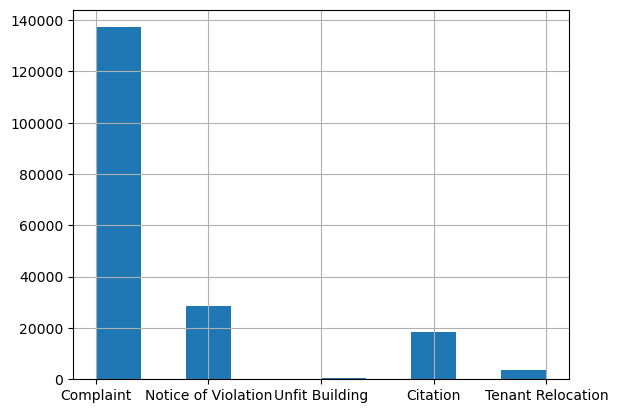

In [24]:
df["RecordType"].hist()

###### For each category, print out the "Description" of several examples. What kinds of things are included?

In [ ]:
df[df["RecordType"] == "Citation"]["Description"][:5] 
#this filters record type for "citation" and then pulls description field and gives the first 5 descriptions

#Looks like unpermitted outdoor things, reports of junk, parking cars in yards.. 

###### Build a new dataset that includes only the "RecordType", "OriginalZip", and "Description" columns.

In [74]:
new_df = df.loc[:, ["RecordType", "OriginalZip", "Description"]]
new_df.head()

,RecordType,OriginalZip,Description
0,Complaint,98101.0,"Elevator gets stuck at least 3 times a week, f..."
1,Complaint,98103.0,Concerned about RV pumpout that is currently b...
2,Complaint,98122.0,The vacant red apple building and adjacent bui...
3,Complaint,98117.0,Trailor and camper parked in back yard. Peopl...
4,Complaint,98101.0,"Illegal use of property.""Hawkers"" or vendors (..."


###### Use this second dataset to filter the dataset down to just rows from your zipcode.

In [80]:
#My zip is also 98112!
second_df = new_df.loc[new_df["OriginalZip"] == 98112] # Filters to my zip

In [81]:
second_df.head() # complaints seem extremely characteristic of 98112.

,RecordType,OriginalZip,Description
17,Complaint,98112.0,5-6 cats on the property in a SF5 zone.
21,Complaint,98112.0,Built 12 ft x 12 ft attached addition to west ...
23,Complaint,98112.0,light fixture in stairwell of duplex does not ...
31,Complaint,98112.0,NaN
69,Complaint,98112.0,Building a fence over 6 ft high in the require...


###### Now look at the number and proportion of different types of records in this subset.

<Axes: >

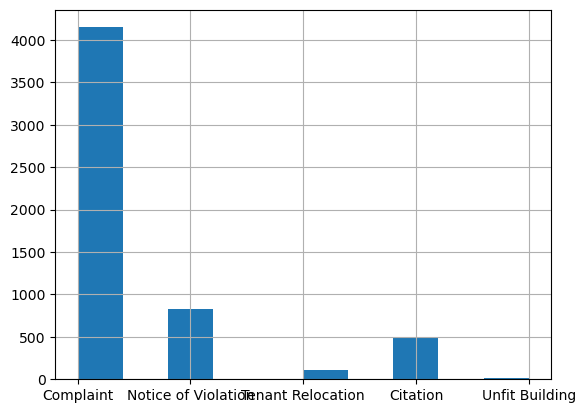

In [82]:
second_df["RecordType"].hist()

In [86]:
record_counts = second_df["RecordType"].value_counts() #look at the frequency of types of complaints in 98112
print (record_counts)

Complaint              4148
Notice of Violation     830
Citation                504
Tenant Relocation       113
Unfit Building           13
Name: RecordType, dtype: int64


In [88]:
record_proportions = record_counts / len(second_df) #proportion of complaints in 98112
print (record_proportions)

Complaint              0.739658
Notice of Violation    0.148003
Citation               0.089872
Tenant Relocation      0.020150
Unfit Building         0.002318
Name: RecordType, dtype: float64


In [90]:
record_proportions_all = (df["RecordType"].value_counts()) / len(df) #proportion of complaints, all zips
print (record_proportions_all)

#Proportions appear to be very similar to what is recorded in seattle overall. 

Complaint              0.728983
Notice of Violation    0.151209
Citation               0.098798
Tenant Relocation      0.019331
Unfit Building         0.001679
Name: RecordType, dtype: float64


###### Once again, print out the "Description" of several examples from each category. What kinds of things are included?

In [92]:
second_df[second_df["RecordType"] == "Citation"]["Description"][:5] 
#this filters record type for "citation" and then pulls description field and gives the first 5 descriptions

#No cats observed! 

614     Did not observe cats or small animals.I will m...
4797                               junk storage violation
4839                    minor outdoor storage violations.
4936    Parking and storage of vehicles in rear yard. ...
4952    Items stored in south driveway side yard and p...
Name: Description, dtype: object

In [94]:
second_df.to_csv("filtered_data.tsv", sep='\t', index=False)

###### It's About Time
Create a new timeseries (use a pandas Series) that contains zip code and that uses the "OpenDate" column as the index. Be sure to check the type of the "OpenDate" column and make sure it's in the pandas datetime format.

In [96]:
df["OpenDate"] = pd.to_datetime(df["OpenDate"]) # this just sets OpenDate as the index

In [97]:
time_series = pd.Series(df["OriginalZip"].values, index=df["OpenDate"]) #makes OpenDate as the key
print(time_series)

OpenDate
2003-11-10    98101.0
2003-11-10    98103.0
2003-11-10    98122.0
2003-11-10    98117.0
2003-11-10    98101.0
               ...   
2023-05-12    98121.0
2023-05-12    98103.0
2023-05-12    98109.0
2023-05-12    98109.0
2023-05-12    98108.0
Length: 188243, dtype: float64


###### Use the .resample() function associated with your pandas time series so that it shows the number of complaints per week overall and visualize this with a time series plot.

In [104]:
complaints_per_week = df.resample("W", on="OpenDate")["OriginalZip"].count()

<Axes: xlabel='OpenDate'>

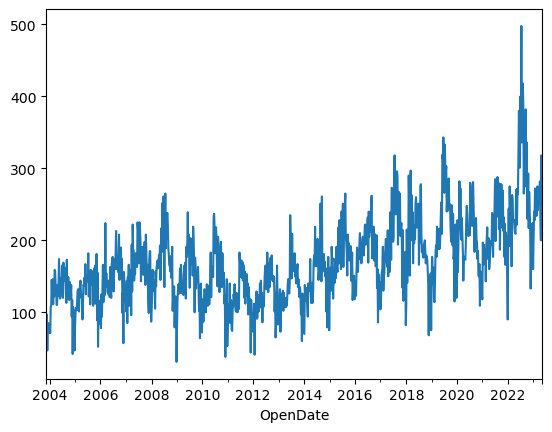

In [105]:
#PLOT! Also, WTF happened after 2012. Easier to make complaints? Economic factors? 
complaints_per_week.plot()

In [129]:
### Ok lets look at the types of complaints from RecordType over time... but lets look at everything all at once.

# Convert openDate
df["OpenDate"] = pd.to_datetime(df["OpenDate"])

# Grouping by RecordType and OpenDate, these are my axes. Then doing a transform, which applies to EACH GROUP.
# Then it counts how many things are in each group.
df["ComplaintNum"] = df.groupby(["RecordType", "OpenDate"])["RecordType"].transform("count") #transform!! 

# Group the data by "RecordType" and "OpenDate" and sum the "ComplaintNum" for each group
complaints_by_type_and_date = df.groupby(["RecordType", "OpenDate"]).sum(numeric_only=True)["ComplaintNum"]

# Reshape the data to wide format using the "unstack" method
complaints_by_type_and_date = complaints_by_type_and_date.unstack(level=0)


<Axes: xlabel='OpenDate'>

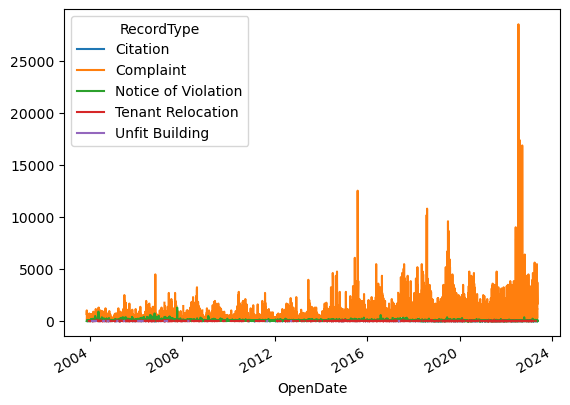

In [130]:
complaints_by_type_and_date.plot() #ok not great, but i'll take it